In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\uber.csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


## PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.drop(labels = 'Unnamed: 0', inplace = True, axis = 1)
df.drop(labels = 'key', inplace = True, axis = 1)

In [11]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

### splitting pickup_datetime into day, hour, month, year, weekday

In [14]:
import calendar

df['day'] = df['pickup_datetime'].apply(lambda x: x.day)
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
df['weekday'] = df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

df.drop(labels = 'pickup_datetime', inplace = True, axis = 1)

In [15]:
df.weekday = df.weekday.map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Friday': 4, 'Saturday': 5})

In [16]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,NaN
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,0.0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,4.0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,1.0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,3.0


## IDENTIFYING OUTLIERS

In [17]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    
    outliers = df[((df < q1 - 1.5*IQR) | (df > q3 + 1.5*IQR))]
    return outliers

In [18]:
outliers = find_outliers_IQR(df['fare_amount'])
outliers
print(len(outliers))
print(outliers.max())
print(outliers.min())

17166
499.0
-52.0


## Calculating distance between drop and pickup coordinates

In [19]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_lati = lati2 - lati1
    
    dist_long = long2 - long1
    
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    
    return c
    

In [20]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

In [21]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,NaN,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,4.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,4.0,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,NaN,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,0.0,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,4.0,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,1.0,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,3.0,3.539715


In [22]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)
df.drop(df[(df['fare_amount'] > 100) & (df['Distance'] < 1)].index, inplace = True)
df.drop(df[(df['fare_amount'] < 100) & (df['Distance'] > 100)].index, inplace = True)

## CORR

<Axes: >

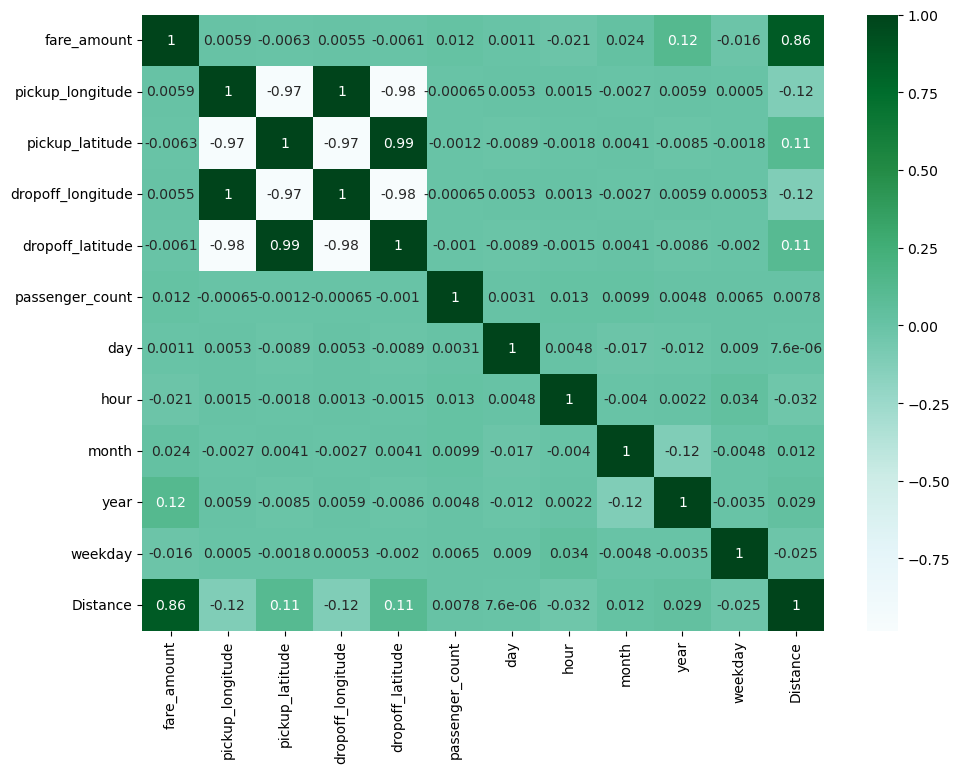

In [23]:
plt.figure(figsize = (11, 8))

sns.heatmap(df.corr(), annot = True, cmap = 'BuGn')

## Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std

StandardScaler()

In [25]:
x = df['Distance'].values.reshape(-1, 1)
y = df['fare_amount'].values.reshape(-1, 1)

In [26]:
x = std.fit_transform(x)
y = std.fit_transform(y)

In [27]:
x

array([[-0.43819769],
       [-0.22258873],
       [ 0.49552213],
       ...,
       [ 2.67145829],
       [ 0.07874908],
       [ 0.60173174]])

In [28]:
y

array([[-0.39820843],
       [-0.37738556],
       [ 0.1640092 ],
       ...,
       [ 2.03806797],
       [ 0.3305922 ],
       [ 0.28894645]])

## Splitting the dataset

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0)

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [31]:
model.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(x_test)

In [33]:
new_df = pd.DataFrame()
new_df[['Actual']] = y_test
new_df[['Predicated']] = y_pred
new_df

,Actual,Predicated
0,-0.335740,-0.491765
1,-0.377386,-0.347326
2,0.486764,-0.140674
3,4.005830,3.977750
4,-0.793843,-0.598737
...,...,...
99719,-0.710552,-0.465081
99720,2.985509,3.540058
99721,-0.554380,-0.350909
99722,2.621108,2.577163


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.27150057864971855
0.7315077231214984


## RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 10)
reg

RandomForestRegressor(random_state=10)

In [37]:
y_train = np.ravel(y_train)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [38]:
y_test

array([[-0.3357398 ],
       [-0.37738556],
       [ 0.48676377],
       ...,
       [-0.55437999],
       [ 2.62110848],
       [-0.3357398 ]])

In [39]:
y_pred

array([-0.56000217, -0.34302781, -0.19247842, ..., -0.5486537 ,
        2.08747024, -0.20996964])

In [40]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


0.3218273604669403
0.6817385760158979
